# Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
sns.set_theme(style="whitegrid")
sns.set(style="ticks", color_codes=True)

In [2]:
DrugData = pd.read_csv('drug-use-by-age.csv')
DrugData = DrugData.replace('-',0.0)
DrugData.iloc[:,2:] = DrugData.iloc[:,2:].astype('float64')
DrugData.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0


---

# Analysing Correlations

<AxesSubplot:>

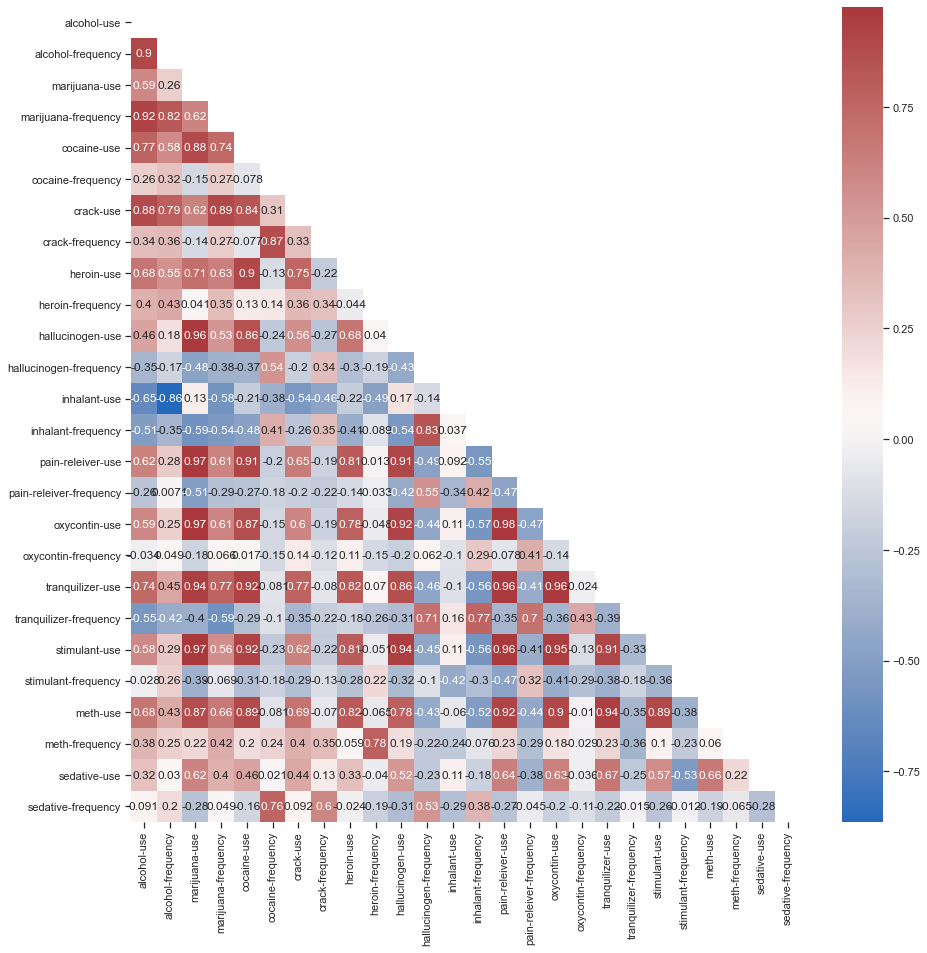

In [3]:
Corr_Matrix = DrugData.iloc[:,2:].corr()
mask = np.triu(np.ones_like(Corr_Matrix, dtype=bool))
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Corr_Matrix,annot=True,mask=mask,cmap="vlag")

# Truncating The Data: Splitting Data Into Use and Frequency Subsets

### Drug Use Percentage Subset

In [4]:
Substance_Use_Data = DrugData[['alcohol-use', 'marijuana-use',
                               'cocaine-use', 'crack-use', 'heroin-use',
                               'hallucinogen-use', 'inhalant-use',
                               'pain-releiver-use', 'oxycontin-use',
                               'tranquilizer-use', 'stimulant-use',
                               'meth-use', 'sedative-use']]

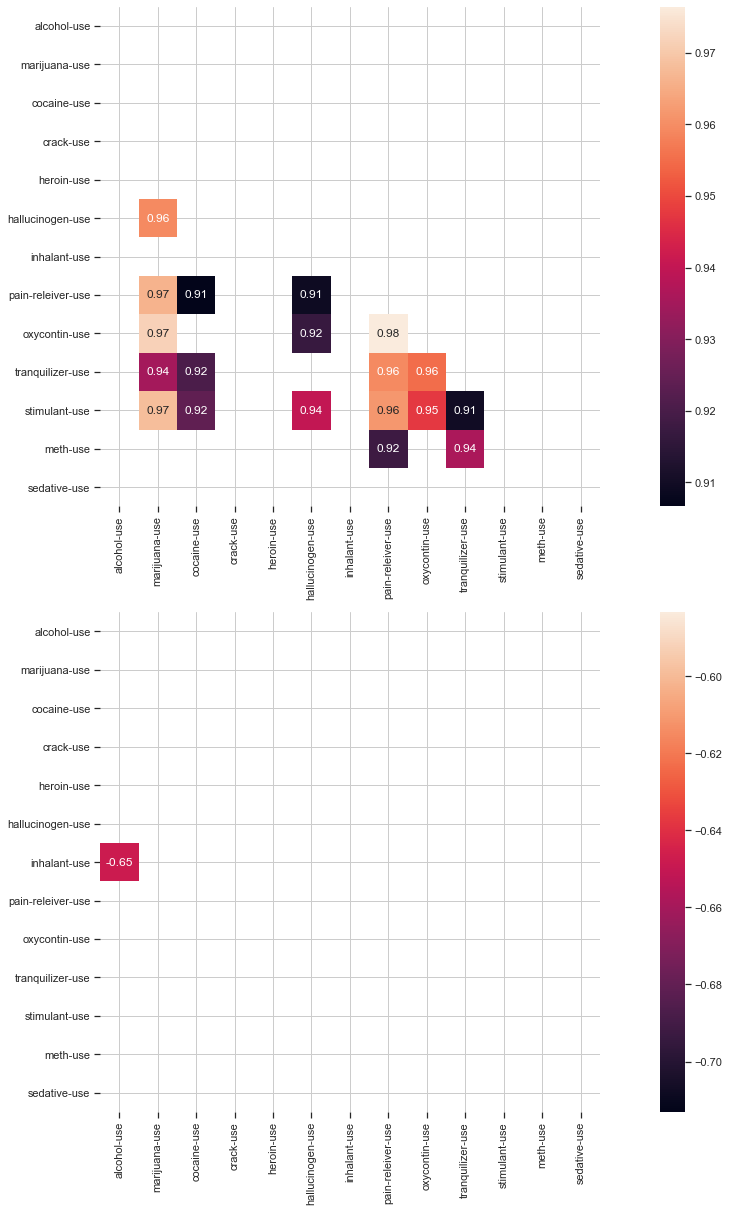

In [5]:
Corr_Matrix = Substance_Use_Data.corr()

Corr_Matrix_Positive = Corr_Matrix.where(Corr_Matrix > 0.9, np.nan)
mask1 = np.triu(np.ones_like(Corr_Matrix_Positive, dtype=bool))

Corr_Matrix_Negative = Corr_Matrix.where(Corr_Matrix < -0.6, np.nan)
mask2 = np.triu(np.ones_like(Corr_Matrix_Negative, dtype=bool))

f, axes = plt.subplots(2,1,figsize=(17, 17))

sns.heatmap(Corr_Matrix_Positive,annot=True,square=True,mask=mask1,cmap="rocket",ax=axes[0])
axes[0].grid()
sns.heatmap(Corr_Matrix_Negative,annot=True,square=True,mask=mask2,cmap="rocket",ax=axes[1])
axes[1].grid()

plt.tight_layout()

### Drug Use Frequency Subset

In [6]:
Use_Frequency_Data = DrugData[['alcohol-frequency', 'marijuana-frequency',
                               'cocaine-frequency', 'crack-frequency',
                               'heroin-frequency', 'hallucinogen-frequency',
                               'inhalant-frequency', 'pain-releiver-frequency',
                               'oxycontin-frequency', 'tranquilizer-frequency',
                               'stimulant-frequency','meth-frequency',
                               'sedative-frequency']]

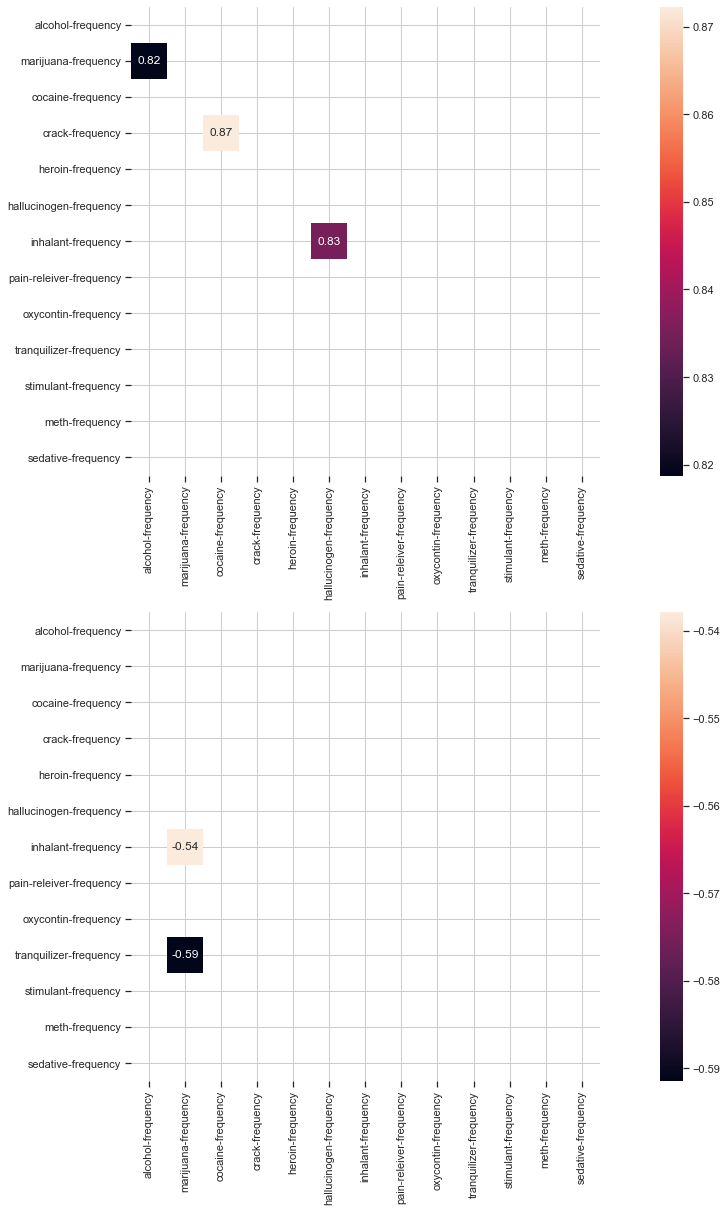

In [7]:
Corr_Matrix = Use_Frequency_Data.corr()
Corr_Matrix_Positive = Corr_Matrix.where(Corr_Matrix > 0.8, np.nan)
mask1 = np.triu(np.ones_like(Corr_Matrix_Positive, dtype=bool))
f, axes = plt.subplots(2,1,figsize=(17, 17))
sns.heatmap(Corr_Matrix_Positive,annot=True,square=True,mask=mask1,cmap="rocket",ax=axes[0])
axes[0].grid()

Corr_Matrix_Negative = Corr_Matrix.where(Corr_Matrix < -0.5, np.nan)
mask2 = np.triu(np.ones_like(Corr_Matrix_Negative, dtype=bool))
sns.heatmap(Corr_Matrix_Negative,annot=True,square=True,mask=mask2,cmap="rocket",ax=axes[1])
axes[1].grid()

plt.tight_layout()

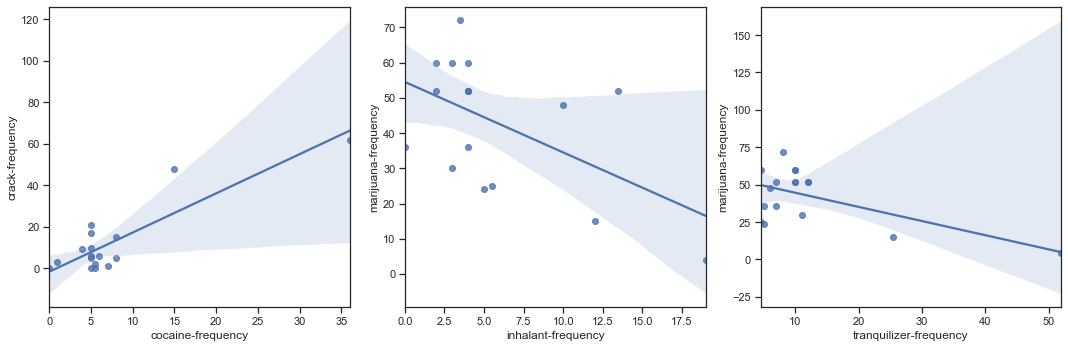

In [8]:
f, ax = plt.subplots(1,3,figsize=(15,5))

sns.regplot(x='cocaine-frequency',y='crack-frequency',data=DrugData,ax=ax[0])
sns.regplot(x='inhalant-frequency',y='marijuana-frequency',data=DrugData,ax=ax[1])
sns.regplot(x='tranquilizer-frequency',y='marijuana-frequency',data=DrugData,ax=ax[2])
ax[0].set_xlabel('cocaine-frequency')
ax[1].set_xlabel('inhalant-frequency')
ax[2].set_xlabel('tranquilizer-frequency')
ax[0].set_ylabel('crack-frequency')
ax[1].set_ylabel('marijuana-frequency')
ax[2].set_ylabel('marijuana-frequency')
plt.tight_layout()

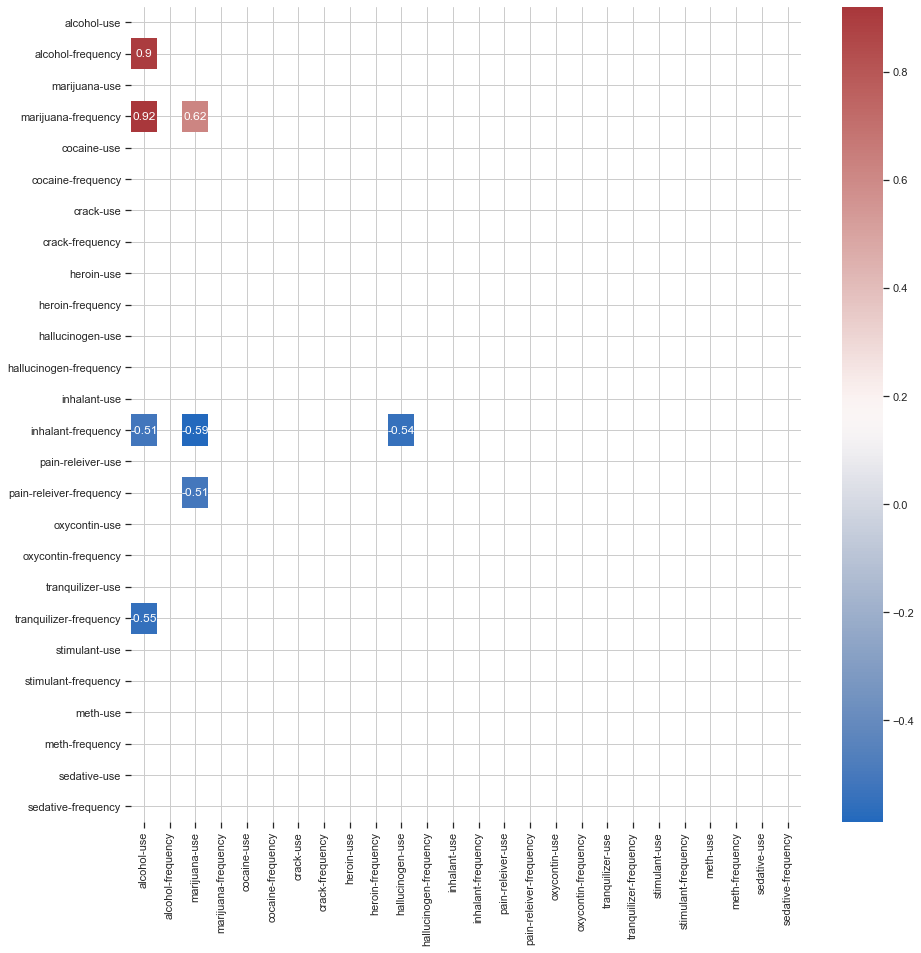

In [9]:
Corr_Matrix = DrugData.iloc[:,2:].corr()
mask = np.triu(np.ones_like(Corr_Matrix, dtype=bool))
mask2 = np.tril(np.ones_like(Corr_Matrix, dtype=bool))

for i in range(0,int(len(mask2)/2)):
    for j in range(0,int(len(mask2)/2)):
        mask2[int(2*i)+1,int(2*j)] = False

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Corr_Matrix.where(np.abs(Corr_Matrix) > 0.5, np.nan),annot=True,mask=mask+mask2,cmap="vlag")
ax.grid()

### Finding the Highest Correlation Vectors between Substance Use and Frequency

In [10]:
Substance_Use_and_Freq = DrugData[['alcohol-use', 'alcohol-frequency',
                                   'marijuana-use', 'marijuana-frequency',
                                   'hallucinogen-use', 'inhalant-frequency',
                                   'pain-releiver-frequency','tranquilizer-frequency']]

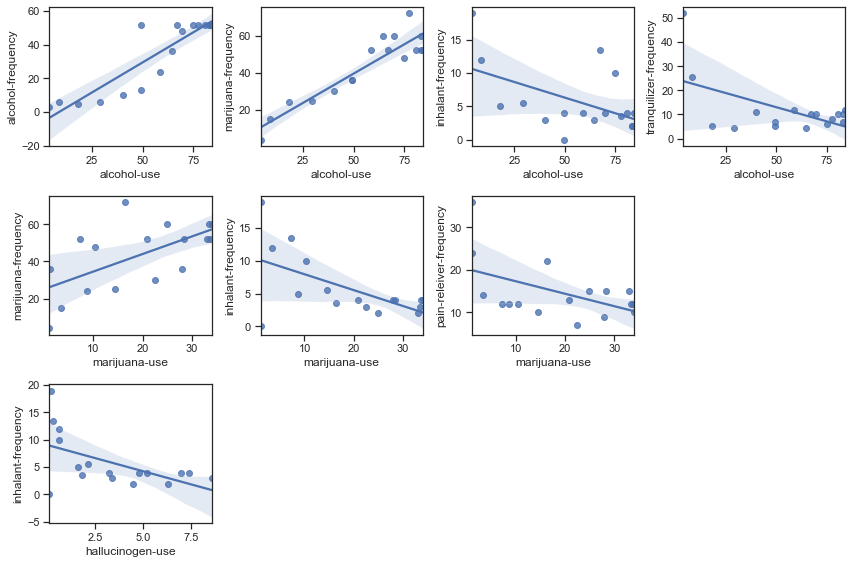

In [11]:
f, ax = plt.subplots(3,4,figsize=(12,8))

sns.regplot(x='alcohol-use',y='alcohol-frequency',data=DrugData,ax=ax[0,0])
sns.regplot(x='alcohol-use',y='marijuana-frequency',data=DrugData,ax=ax[0,1])
sns.regplot(x='alcohol-use',y='inhalant-frequency',data=DrugData,ax=ax[0,2])
sns.regplot(x='alcohol-use',y='tranquilizer-frequency',data=DrugData,ax=ax[0,3])

ax[0,0].set_xlabel('alcohol-use')
ax[0,1].set_xlabel('alcohol-use')
ax[0,2].set_xlabel('alcohol-use')
ax[0,3].set_xlabel('alcohol-use')
ax[0,0].set_ylabel('alcohol-frequency')
ax[0,1].set_ylabel('marijuana-frequency')
ax[0,2].set_ylabel('inhalant-frequency')
ax[0,3].set_ylabel('tranquilizer-frequency')

sns.regplot(x='marijuana-use',y='marijuana-frequency',data=DrugData,ax=ax[1,0])
sns.regplot(x='marijuana-use',y='inhalant-frequency',data=DrugData,ax=ax[1,1])
sns.regplot(x='marijuana-use',y='pain-releiver-frequency',data=DrugData,ax=ax[1,2])

ax[1,3].set_visible(False)
ax[1,0].set_xlabel('marijuana-use')
ax[1,1].set_xlabel('marijuana-use')
ax[1,2].set_xlabel('marijuana-use')
ax[1,0].set_ylabel('marijuana-frequency')
ax[1,1].set_ylabel('inhalant-frequency')
ax[1,2].set_ylabel('pain-releiver-frequency')

sns.regplot(x='hallucinogen-use',y='inhalant-frequency',data=DrugData,ax=ax[2,0])

ax[2,1].set_visible(False)
ax[2,2].set_visible(False)
ax[2,3].set_visible(False)
ax[2,0].set_xlabel('hallucinogen-use')
ax[2,0].set_ylabel('inhalant-frequency')

plt.tight_layout()

---